
## **<center>Linear Regression - Avocado price dataset Project</center>**

---
<a name = Section2></a>
# **Problem Statement**
---

- Avacard-corp avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.

- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.

- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.

- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

- Avocado prices have rocketed in recent years by up to 129%, with the average national price in the US of a single Hass avocado reaching $2.10 in 2019, almost doubling in just one year.

- Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

- Task is to predict the optimal price of the avocardo using the previous sales data of avocardo according to different regions.**model's predictions**.

<a name = Section33></a>
### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")  

<a name = Section33></a>
### **Data Acquisition**

In [2]:
dfavocado=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv')
dfavocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


---
<a name = Section4></a>
- The dataset contains weekly retail scan data for National Retail Volume (units) and price.

- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

- The column AveragePrice is the average price of a single avocado.

- This is the data that we have to predict for future samples.

||Column Name|Description|
|:--|:--|:--|
||**Id**| Unique identity of each observation. |
||**Date**| The date of the observation. |
||**AveragePrice**| The average price of a single avocado. |
||**Total Volume**| Total number of avocados sold. |
||**4046**| Total number of avocados with PLU 4046 sold. |
||**4225**| Total number of avocados with PLU 4225 sold. |
||**4770**| Total number of avocados with PLU 4770 sold. |
||**Total Bags**| Total number of bags sold. |
||**Small Bags**| Total number of small bags sold.|
||**Large Bags**| Total number of large bags sold.|
||**XLarge Bags**| Total number of extra-large bags sold.|
||**type**| Type of an avocado (conventional or organic).|
||**year**| The year of observation. |
||**Region**| The city or region of the observation.|

<a name = Section41></a>
### **Data Info, Data Description and Null Value Checking**

- In this section we will get **description** and **statistics** about the data.

In [3]:
dfavocado.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
dfavocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [5]:
dfavocado.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [6]:
dfavocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


<a name = Section5></a>
### **Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [7]:
from pandas_profiling import ProfileReport
profile=ProfileReport(dfavocado,title='Pandas Profile Report')
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<a name = Section41></a>
### **Data Pre-processing**


In [8]:
dfavocado['otherPLU']=dfavocado['Total Volume']-(dfavocado['4046']+dfavocado['4225']+dfavocado['4770'])

In [9]:
import datetime

In [10]:
dfavocado['Date'] = pd.to_datetime(dfavocado['Date'], format='%Y-%m-%d')

In [11]:
dfavocado['Month']=dfavocado['Date'].dt.month

In [12]:
dfavocadofinal=dfavocado.drop(columns=['Date','Total Volume'])

In [13]:
cols=['AveragePrice','4046','4225','4770','otherPLU','Small Bags','Large Bags','XLarge Bags','Total Bags',
     'type','Month','year','region']
dfavocadofinal=dfavocadofinal[cols]

In [14]:
#Dropping the columns
dfavocadofinal.drop(columns=['Small Bags','Large Bags','XLarge Bags','Total Bags'],inplace=True)

In [15]:
dfavocadofinal.sample(n=5)

,AveragePrice,4046,4225,4770,otherPLU,type,Month,year,region
14669,1.39,55508.03,137201.71,269.80,59672.85,organic,5,2016,West
13255,1.75,3832.04,54656.68,5019.61,39620.46,organic,7,2016,Midsouth
17949,1.58,19823.16,58366.54,201.04,296468.94,organic,3,2018,Northeast
4662,0.97,925373.29,636658.22,27641.97,504325.11,conventional,5,2016,Plains
15016,1.35,231.39,135.86,0.00,9748.70,organic,10,2017,BuffaloRochester


In [16]:
dfavocadofinal=pd.get_dummies(dfavocadofinal,columns=['type'],drop_first=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le=LabelEncoder()
dfregiion = dfavocadofinal[['region']].apply(le.fit_transform)

In [19]:
dfavocadofinal.drop('region',axis=1,inplace=True)

In [20]:
dfavocadofinal=dfavocadofinal.join(dfregiion['region'])

In [21]:
dfavocadofinal.sample(n=5)

,AveragePrice,4046,4225,4770,otherPLU,Month,year,type_organic,region
2776,0.74,576883.27,154758.26,20222.28,134020.11,8,2015,0,53
6916,1.52,311873.22,66760.95,105.13,127089.16,6,2017,0,24
4153,0.99,654357.46,1639480.98,144264.21,735357.59,2,2016,0,25
2744,0.99,2511453.54,2163704.41,101626.05,591547.44,3,2015,0,52
5000,2.20,130025.36,285048.20,3399.09,59465.15,10,2016,0,42


<AxesSubplot:>

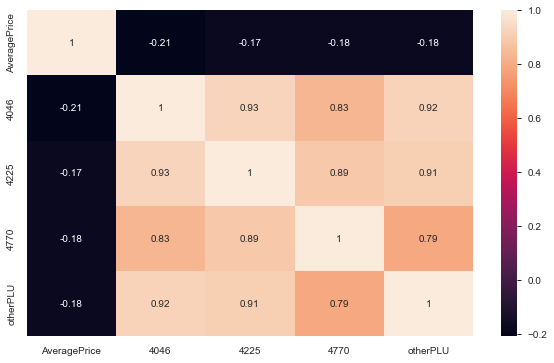

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(dfavocadofinal[['AveragePrice','4046','4225','4770','otherPLU']].corr(),annot=True)

<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

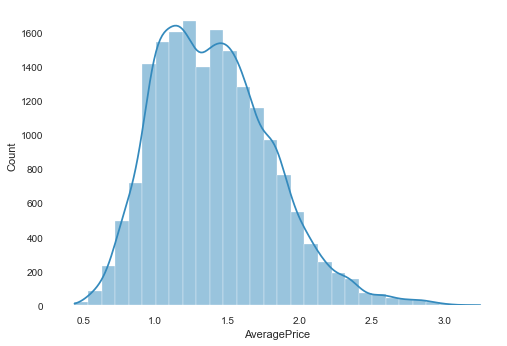

In [59]:
sns.histplot(dfavocadofinal['AveragePrice'],kde=True,bins=30)

<a name = Section41></a>
### **Splitting the Data**

In [22]:
X=dfavocadofinal.drop('AveragePrice',axis=1)
y=dfavocadofinal['AveragePrice']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

<a name = Section41></a>
### **Train and Predict Using LinearRegression Model**

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
predictions=lr.predict(X_test)

<AxesSubplot:xlabel='AveragePrice'>

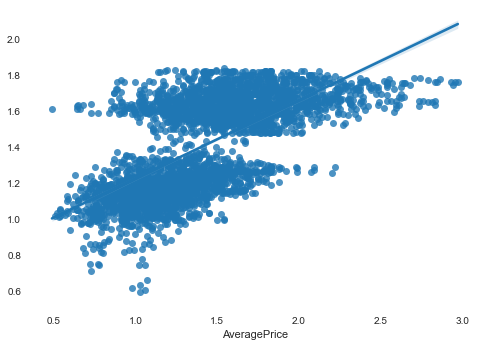

In [27]:
sns.regplot(y_test,predictions)

In [28]:
MAE = metrics.mean_absolute_error(y_test, predictions)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, predictions)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,predictions)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 0.23461570173570817
MSE for test set is 0.09135451807686062
RMSE for test set is 0.3022490993813888
R2 score for test set is 0.43755555939251656
Adjusted R2 score for test set is 0.43631975727088523


<a name = Section41></a>
###  Applying Scaling on the Features 4046,4225,4770 and otherPLU 

In [29]:
dfavocadofinal.sample(n=5)

,AveragePrice,4046,4225,4770,otherPLU,Month,year,type_organic,region
5257,1.14,9351.32,25545.36,24.20,46097.43,11,2016,0,47
11615,1.51,1630.04,2660.43,0.00,158.64,2,2015,1,47
388,1.18,23580.70,56317.45,35107.11,67851.56,7,2015,0,7
8562,1.32,68088.95,87220.18,5567.45,97670.97,3,2018,0,7
13376,1.26,516.41,9.02,0.00,2943.35,3,2016,1,27


In [30]:
ss=StandardScaler()

In [31]:
scalardata=ss.fit(X[['4046','4225','4770','otherPLU']])

In [32]:
data=scalardata.transform(X[['4046','4225','4770','otherPLU']])

In [33]:
data=pd.DataFrame(data,columns=['4046','4225','4770','otherPLU'])

In [34]:
X.drop(columns=['4046','4225','4770','otherPLU'],inplace=True)

In [35]:
X=X.join(data)

In [36]:
X.head()

,Month,year,type_organic,region,4046,4225,4770,otherPLU
0,12,2015,0,0,-0.230816,-0.199902,-0.212091,-0.234172
1,12,2015,0,0,-0.231103,-0.208054,-0.211997,-0.233352
2,12,2015,0,0,-0.231007,-0.154478,-0.211325,-0.234732
3,12,2015,0,0,-0.230741,-0.185350,-0.211864,-0.237098
4,11,2015,0,0,-0.230891,-0.208719,-0.211834,-0.236720


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
predictions=lr.predict(X_test)

<AxesSubplot:xlabel='AveragePrice'>

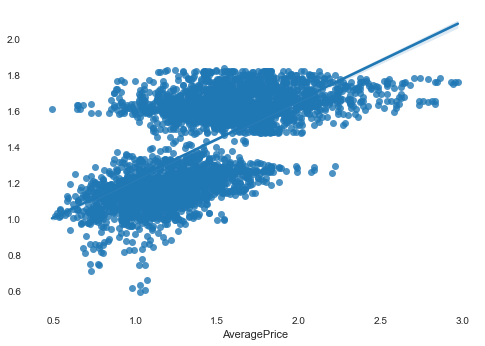

In [40]:
sns.regplot(y_test,predictions)

In [41]:
MAE = metrics.mean_absolute_error(y_test, predictions)   
print('MAE is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, predictions)
print('MSE for test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE for test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,predictions)
print("R2 score for test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for test set is {}".format(adj_r_squared))

MAE is 0.23461570173570936
MSE for test set is 0.09135451807686151
RMSE for test set is 0.3022490993813902
R2 score for test set is 0.4375555593925111
Adjusted R2 score for test set is 0.4363197572708797


<a name = Section41></a>
### **Train and Predict Using RandomForestRegressor Model**

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rfc=RandomForestRegressor(n_estimators=20,random_state=70)

In [44]:
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20, random_state=70)

In [45]:
predictions1=rfc.predict(X_test)

In [46]:
MAE = metrics.mean_absolute_error(y_test, predictions1)   
print('MAE for Test is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, predictions1)
print('MSE for Test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions1))
print('RMSE for Test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,predictions1)
print("R2 score for Test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for Test set is {}".format(adj_r_squared))

MAE for Test is 0.09246643835616437
MSE for Test set is 0.018146768698630137
RMSE for Test set is 0.13470994283507856
R2 score for Test set is 0.8882753761456309
Adjusted R2 score for Test set is 0.8880298949616608


<AxesSubplot:xlabel='AveragePrice'>

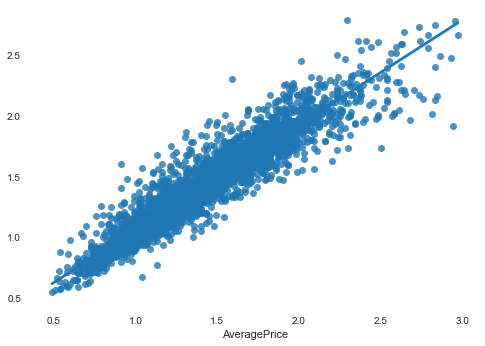

In [47]:
sns.regplot(y_test,predictions1)

<a name = Section41></a>
### **Train and Predict Using DecisionTreeRegressor Model**

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dt=DecisionTreeRegressor(random_state=70)

In [50]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=70)

In [51]:
predictions2=dt.predict(X_test)

<AxesSubplot:xlabel='AveragePrice'>

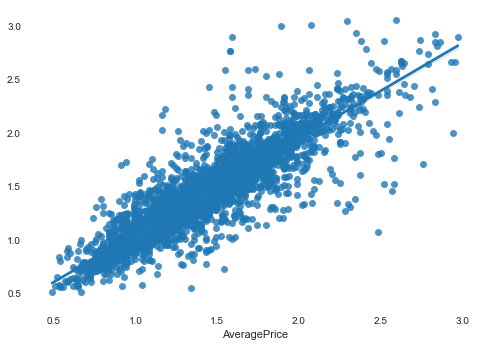

In [52]:
sns.regplot(y_test,predictions2)

In [53]:
MAE = metrics.mean_absolute_error(y_test, predictions2)   
print('MAE for Test is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, predictions2)
print('MSE for Test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions2))
print('RMSE for Test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,predictions2)
print("R2 score for Test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for Test set is {}".format(adj_r_squared))

MAE for Test is 0.1186986301369863
MSE for Test set is 0.035487260273972594
RMSE for Test set is 0.18838062605791656
R2 score for Test set is 0.7815147770064993
Adjusted R2 score for Test set is 0.781034721586574


<a name = Section41></a>
### **Conclusion**

Among the three Models, RandomForest gave best predictions